# Serial Position Curve

Compute the serial position curve.

The **serial position effect** refers to the tendency to better recall items from the beginning and end of a list, with poorer recall for middle items. It can be measured using a free recall task, where participants study a list and then recall items in any order. The resulting **serial position curve** plots recall probability by study position, capturing this characteristic pattern.

The output of our `spc` function is a vector of length equal to the number of study positions, with each element representing the probability of recalling an item from that position. The function itself can be readily transformed with `jax`'s functional transformations, such as `jit` or `vmap`, to improve performance for larger datasets.

Our plotting function `plot_spc` takes this vector and creates a line plot, with the x-axis representing the study positions and the y-axis representing the recall rates.

## Simple Case: When Study Lists are Uniform
With a 2-D `recalls` array tracking trial by recall position array of recalled items where non-zero values indicate the study position of the recalled item, the serial position curve can be calculated by tabulating the frequency of each non-zero value across trials then dividing by the number of trials:

In [ ]:
from jaxcmr.analyses.spc import spc, plot_spc
from jaxcmr.helpers import generate_trial_mask, load_data, find_project_root
import os
from jax import jit


Array([0.6428572 , 0.56904763, 0.50476193, 0.45238096, 0.40952381,
       0.3857143 , 0.35000002, 0.3357143 , 0.3357143 , 0.3       ,
       0.32380953, 0.3261905 , 0.3261905 , 0.32380953, 0.29761904,
       0.3119048 , 0.32380953, 0.29761904, 0.27857143, 0.27142859,
       0.2904762 , 0.28333333, 0.27857143, 0.32857144, 0.2809524 ,
       0.3309524 , 0.32857144, 0.3166667 , 0.3261905 , 0.33809525,
       0.37380955, 0.32380953, 0.36190477, 0.3404762 , 0.35952383,
       0.37619048, 0.3904762 , 0.42380953, 0.41428572, 0.34523812],      dtype=float32)

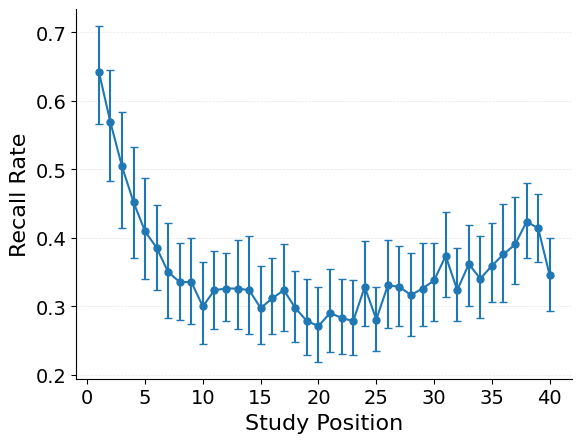

In [2]:
# parameters
run_tag = "SPC"
data_name = "LohnasKahana2014"
data_query = "data['list_type'] == 1"
data_path =  os.path.join(find_project_root(), "data/LohnasKahana2014.h5")

# set up data structures
data = load_data(data_path)
recalls = data["recalls"]
presentations = data["pres_itemnos"]
list_length = data["listLength"][0].item()
trial_mask = generate_trial_mask(data, data_query)

# plot SPC
plot_spc(data, generate_trial_mask(data, data_query))
jit(spc, static_argnames=("size", "list_length"))(
    recalls[trial_mask], presentations[trial_mask], list_length
)


## Complex Case: Item Repetitions

If items can be repeated within the same study list, values in our 2-D `recalls` can only indicate one of the study positions of the recalled item.

To account for this, we additionally use a 2-D `presentations` array tracking trial by study position for presented items.
A helper function `all_study_positions` is mapped over the `recalls` array to create a 3-D array of study positions for each recalled item, where the first dimension is the trial, the second dimension is the recall position, and the third dimension is the study position.
This allows us to calculate the serial position curve by tabulating the frequency of each study position across trials and recall positions, then dividing by the number of trials and the maximum number of item repetitions.

The resulting serial position curve counts recalls of items with multiple study positions as a single recall of *all* of those study positions. This function works even for study lists without repetitions, but it is less efficient than the simple case.

Array([0.7571429 , 0.70952386, 0.6880953 , 0.6666667 , 0.6642857 ,
       0.6952381 , 0.6738095 , 0.6761905 , 0.64761907, 0.64761907,
       0.63809526, 0.59761906, 0.62857145, 0.5952381 , 0.6428572 ,
       0.56904763, 0.6047619 , 0.5928572 , 0.5857143 , 0.6047619 ,
       0.552381  , 0.56904763, 0.57380956, 0.552381  , 0.6119048 ,
       0.56666666, 0.6047619 , 0.6119048 , 0.6214286 , 0.6166667 ,
       0.6452381 , 0.6238096 , 0.6166667 , 0.6571429 , 0.6666667 ,
       0.68333334, 0.6952381 , 0.6857143 , 0.6714286 , 0.67857146],      dtype=float32)

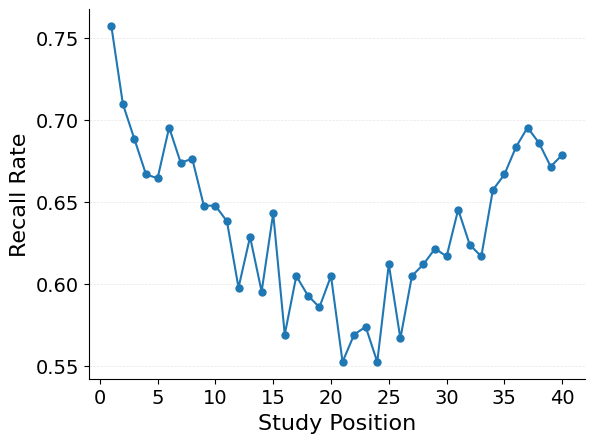

In [4]:
# parameters
run_tag = "SPC"
data_name = "LohnasKahana2014"
data_query = "data['list_type'] == 3"
data_path =  os.path.join(find_project_root(), "data/LohnasKahana2014.h5")

# set up data structures
data = load_data(data_path)
# (Optional) Reset subjects for uniformity / to disable error bar plotting
data["subject"] *= 0
recalls = data["recalls"]
presentations = data["pres_itemnos"]
list_length = data["listLength"][0].item()
trial_mask = generate_trial_mask(data, data_query)

# plot SPC
plot_spc(data, generate_trial_mask(data, data_query))
jit(spc, static_argnames=("size", "list_length"))(
    recalls[trial_mask], presentations[trial_mask], list_length
)
